# Economic Dispatch With Valve Loading Point Effect

Developer: Rafael Pavan (MSc Candidate)

PPGEE - UNESP/FEB

In [1]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

In [2]:
class Economic_Dispatch_VLPE():
    
    '''

    EconomicDispatch_VLE is a class that stores the system test cases data and evaluate the costs of active power generation.
    
    The test systems availabe are:
    
        - 3 generators
        - 13 generators
        - 19 generators
        - 40 generators
        
    '''    

    
    def init(self, n_gen):
        
        if n_gen == 3:
                
            self.pg_max = np.array([600, 200, 400])
            self.pg_min = np.array([100, 50, 100])
            self.demanda = 850
            self.a_k = np.array([0.001562, 0.00482,0.00194])
            self.b_k = np.array([7.92, 7.97, 7.85])
            self.c_k = np.array([561, 78, 310])
            self.e_k = np.array([300, 150, 200])
            self.f_k = np.array([0.0315, 0.063, 0.042])
        
        if n_gen == 13:
                
            self.pg_max = np.array([680, 360, 360, 180, 180, 180, 180, 180, 180, 120, 120, 120, 120]);
            self.pg_min = np.array([0, 0, 0, 60, 60, 60, 60, 60, 60, 40, 40, 55, 55]);
            self.demanda = 2520;
            self.a_k = np.array([0.00028, 0.00056, 0.00056, 0.00324, 0.00324, 0.00324, 0.00324, 0.00324, 0.00324, 0.00284, 0.00284, 0.00284, 0.00284]);
            self.b_k = np.array([8.1, 8.1, 8.1, 7.74, 7.74, 7.74, 7.74, 7.74, 7.74, 8.6, 8.6, 8.6, 8.6]);
            self.c_k = np.array([550, 309, 307, 240, 240, 240, 240, 240, 240, 126, 126, 126, 126]);
            self.e_k = np.array([300, 200, 200, 150, 150, 150, 150, 150, 150, 100, 100, 100, 100]);
            self.f_k = np.array([0.035, 0.042, 0.042, 0.063, 0.063, 0.063, 0.063, 0.063, 0.063, 0.084, 0.084, 0.084, 0.084]);

    
        if n_gen == 19:
                
            self.pg_min = np.array([100, 120, 100, 8, 50, 150, 50, 100, 200, 15, 50, 25, 50, 0, 20, 15, 15, 50, 400]);  
            self.pg_max = np.array([300, 438, 250, 25, 63.75, 300, 63.75, 500, 600, 40, 150, 75, 63.75, 95, 220, 80, 80, 230, 500]);
            self.a_k = np.array([0.0097, 0.0055, 0.0055, 0.0025, 0, 0.008, 0, 0.0075, 0.0085, 0.009, 0.0045, 0.0025, 0, 0.0045, 0.0065, 0.0045, 0.0025, 0.0045, 0.008]);
            self.b_k = np.array([6.8, 4, 4, 0.85, 5.28, 3.5, 5.439, 6, 6, 5.2, 1.6, 0.85, 2.55, 1.6, 4.7, 1.4, 0.85, 1.6, 5.5]);
            self.c_k = np.array([119, 90, 45, 0, 0.891, 110, 21, 88, 55, 90, 65, 78, 49, 85, 80, 90, 10, 25, 90]);
            self.e_k = np.array([90, 79, 0, 0, 0, 0, 0, 0.52, 0, 0, 0, 0.02, 0, 0, 92, 0, 0, 0, 0]); 
            self.f_k = np.array([0.72, 0.05, 0, 0, 0, 0, 0, 0.52, 0, 0, 0, 0.02, 0, 0, 0.75, 0, 0, 0, 0]); 
            self.demanda = 2908;
            
        if n_gen == 40:
        
            self.pg_min = np.array([36, 36,60,80,47,68,110,135,135,130,94,94,125,125, 125,125,220,220,242,242,254,254,254,254,254,254,10,10,10,47,60 ,60, 60, 90, 90, 90, 25, 25, 25, 242]);
            self.pg_max = np.array([114,114,120,190,97,140,300,300,300,300,375,375,500, 500,500,500,500,500,550,550,550,550,550, 550,550,550,150,150,150,97,190 ,190, 190, 200, 200, 200, 110, 110, 110, 550]);
            self.c_k = np.array([94.705,94.705,309.54,369.03,148.89,222.33,287.71,391.98,455.76,722.82,635.2,654.69,913.4,1760.4,1760.4,1760.4,647.85,649.69,647.83,647.81,785.96,785.96,794.53,794.53,801.32,801.32,1055.1,1055.1,1055.1,148.89,222.92, 222.920, 222.920, 107.870, 116.580, 116.580, 307.450, 307.450, 307.450, 647.830]);
            self.b_k = np.array([6.73,6.73,7.07,8.18,5.35,8.05,8.03,6.99,6.6,12.9,12.9,12.8,12.5,8.84,8.84,8.84,7.97,7.95,7.97,7.97,6.63,6.63,6.66,6.66,7.1,7.1,3.33,3.33,3.33,5.35,6.43, 6.43, 6.43, 8.95, 8.62, 8.62, 5.88, 5.88, 5.88, 7.97]);
            self.a_k = np.array([0.0069,0.0069,0.02028,0.00942,0.0114,0.01142,0.00357,0.00492,0.00573,0.00605,0.00515,0.00569,0.00421,0.00752,0.00752,0.00752,0.00313,0.00313,0.00313,0.00313,0.00298,0.00298,0.00284,0.00284,0.00277,0.00277,0.52124,0.52124,0.52124,0.0114,0.0016, 0.00160, 0.00160, 0.00010, 0.00010, 0.00010, 0.01610, 0.01610, 0.01610, 0.00313]);
            self.e_k = np.array([100, 100,100,150,120,100,200,200,200,200,200,200,300,300,300,300, 300,300,300,300,300,300,300,300,300,300,120,120,120,120,150, 150, 150, 200, 200, 200, 80, 80, 80, 300]);                         
            self.f_k = np.array([0.084, 0.084, 0.084, 0.063, 0.077, 0.084, 0.042, 0.042, 0.042, 0.042, 0.042, 0.042, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.035, 0.077, 0.077, 0.077, 0.077, 0.063, 0.063, 0.063, 0.042, 0.042, 0.042, 0.098, 0.098, 0.098, 0.035]);
            self.demanda = 10500
            
        
    def costs(self, potencias):
        
        return np.sum(self.a_k*potencias**2 + self.b_k*potencias + self.c_k + np.abs(self.e_k*np.sin(self.f_k*(self.pg_min-potencias))))
    
    

In [3]:
system = Economic_Dispatch_VLPE()

In [4]:
class Particle_Swarm_Optimization():
    
    def init(self, c1_, c2_, w_max, w_min, inertia_method, max_iter_, n_particles_, alfa_, beta_ ,v_amp_, v_clamp_, initial_, initi = True, constriction_factor = False, inertia_weight=True):
        
        self.c1=c1_ # learning factor for cognitive component
        self.c2=c2_ # learning factor for social component
        self.max_iter = max_iter_ # algorithm maximum number of iterations
        self.n_particles = n_particles_ # algorithm number of particles
        self.alfa = alfa_ # penalization factor for costs
        self.beta = beta_ # penalization factor for demand mismatch
        self.v_amp = v_amp_ # amplitude atenuation for velocity
        self.v_clamp = v_clamp_ # clamping atenuation for velocity 
        self.initial = initial_
        
        self.flag = initi
        
        if constriction_factor == True:
            
            pass
        
            if self.c1+self.c2 <= 4:
                print('Error: c1+c2 must be >= 4')
                
            
        else:
            
            self.wmax = w_max
            self.wmin = w_min
            self.inertia = str(inertia_method)
            
    def init_pop(self, system):
        
        population = np.zeros((self.n_particles,len(system.pg_min)))
        
        for gen in range(len(system.pg_min)):
            
            population[:,gen] = np.random.uniform(system.pg_min[gen],system.pg_max[gen],size=([self.n_particles]))
    
        if self.flag == True:
            population[0,:]=self.initial
            
        return population
    
    def init_vel(self,system):
        
        vel = np.zeros((self.n_particles,len(system.pg_min)))
        
        for gen in range(len(system.pg_min)):
            
            vel[:,gen] = np.random.uniform(-system.pg_max[gen],system.pg_max[gen],size=([self.n_particles]))
        
        return vel

    def objective_function(self, system, population):
        
        evaluated = np.zeros(self.n_particles)
        
        for particle in range(self.n_particles):
            
            evaluated[particle] = system.costs(population[particle,:])
        
        return evaluated
    
    def inequality_constraints(self, system, population):
        
        for gen in range(len(system.pg_min)):
            
            for part in range(self.n_particles):

                if population[part,gen] < system.pg_min[gen]+0.25:
                    population[part,gen] = system.pg_min[gen]+0.25
                if population[part,gen] > system.pg_max[gen]-0.25:
                    population[part,gen] = system.pg_max[gen]-0.25

        return population
           
    def equality_constraints(self, system, population):
        
        generation = np.sum(population,axis=1)
        
        balance = (generation-system.demanda)      
        
        balance[balance>0] = 0
        
        balance = balance**2
        
        return balance
    
    def fitness_function(self, system, costs, balance):
            
        fitness = self.alfa*costs + self.beta*balance
            
        return fitness
    
    def find_gbest(self,fitness,population):
        
        position_gbest = np.argmin(fitness)
        
        gbest = np.copy(population[position_gbest,:])
        
        return gbest, np.min(fitness)
    
    def update_memory(self, system, fitness, population, memory):
        
         
        ev_mem = self.objective_function(system, memory)
        eq_mem = self.equality_constraints(system, memory)
        fit_mem = self.fitness_function(system, ev_mem, eq_mem)
            
        for i in range(len(fit_mem)):
                
            if fit_mem[i] > fitness[i]:
                    
                memory[i,:] = np.copy(population[i,:])
        
        return memory
    
    def update_inertia(self, system, iteration):
        
        if self.inertia == 'linear':
            
            w = self.wmax - (self.wmax-self.wmin)*iteration/self.max_iter
            
        if self.inertia == '':
        
            w = 1
        
        return w
    
    def update_velocity(self, previous_v, w, population, memory, gbest):
        
        r1 = np.random.rand(self.n_particles,len(system.pg_max))
        r2 = np.random.rand(self.n_particles,len(system.pg_max))
        
        
        new_v = previous_v*w + self.c2*r2*(gbest-population) + self.c1*r1*(memory-population)
        
        return new_v
    
    def velocity_clamping(self, system, v):
        
        delta = np.abs(system.pg_max-system.pg_min)
        
        for j in range(self.n_particles):
            
            for k in range(len(system.pg_min)):
                
                if v[j,k] < -delta[k]*self.v_clamp:
                    
                    v[j,k] = -delta[k]*self.v_clamp
                    
                
                if v[j,k] > delta[k]*self.v_clamp:
                    
                    v[j,k] = delta[k]*self.v_clamp
        
        return v
    
    def update_position(self,new_v,population, const_factor):
        
        new_position = np.copy(population) + new_v*1
        
        return new_position
    

    def adjust_dem(self,a, system):

        DIF = system.demanda-np.sum(a)

        parcela = DIF/len(system.pg_min)

        a = a + parcela

        return a


    def adjust_viol(self,a, system):

        flag = np.ones(len(system.pg_min))

        for gen in range(len(system.pg_min)):

            if a[gen] < system.pg_min[gen]+0.05:
                a[gen] = system.pg_min[gen]+0.05

            elif a[gen] > system.pg_max[gen]-0.05:
                a[gen] = system.pg_max[gen]-0.05
            else:
                flag[gen]=0

        return a, flag


    def adjust(self,a,flag,system, fator):

        while (np.abs((np.sum(a)-system.demanda))>fator and np.sum(flag)!=0):

            a, flag = self.adjust_viol(a,system)

            a = self.adjust_dem(a,system)

            a, flag = self.adjust_viol(a,system)

        return a

    
    def optimize(self, system, verbose=True):
        
        pop = self.init_pop(system)
        
        previous_vel = self.init_vel(system)*self.v_amp
        
        self.list_gbest = []
        
        self.list_gbest_costs = []
        self.list_gbest_pen = []
        self.list_gbest_fitness = []
        
        self.list_pop = []
        self.list_costs_evaluation = []
        self.list_generation_pen = []
        self.list_fitness = []
        self.list_inertia = []
        
        global_bests = []
        global_bests_val = []
        
        for iterations in range(self.max_iter):
            
            self.list_pop.append(np.copy(pop))
            
            costs = self.objective_function(system, np.copy(pop))
            
            self.list_costs_evaluation.append(costs)
            
            generation_balance = self.equality_constraints(system, np.copy(pop))
            
            self.list_generation_pen.append(generation_balance)
            
            fit = self.fitness_function(system, costs, generation_balance)
            
            self.list_fitness.append(fit)
            
            gbest, gbest_val = self.find_gbest(fit,np.copy(pop))
            
            flag = np.ones(len(system.pg_min))
 
            
#             if iterations>self.max_iter-5:
#                 gbest = self.adjust(gbest,flag,system, 1e-5)
      
            if iterations == 0:
                
                global_bests.append(gbest)
                global_bests_val.append(gbest_val)
                
            else:
                
                if global_bests_val[-1] > gbest_val:
                    
                    global_bests_val.append(gbest_val)
                    global_bests.append(gbest)
          
            self.list_gbest.append(global_bests[-1])
            
            self.list_gbest_pen.append(self.equality_constraints(system, global_bests[-1].reshape(1,len(system.pg_min))))
            
            self.list_gbest_costs.append(system.costs(global_bests[-1]))
            
            self.list_gbest_fitness.append(self.fitness_function(system, self.list_gbest_costs[-1],self.list_gbest_pen[-1]))
            
            if iterations == 0:
            
                pbest = np.copy(pop)
            
            else:

                pbest = self.update_memory(system, fit, np.copy(pop), np.copy(pbest))
                
            
            w = self.update_inertia(system, iterations)
            
            self.list_inertia.append(w)
            
            new_vel = self.update_velocity(previous_vel, w, np.copy(pop), np.copy(pbest), global_bests[-1])
            
            new_vel = self.velocity_clamping(system, new_vel)
            
            previous_vel = np.copy(new_vel)
            
            new_position = self.update_position(new_vel,np.copy(pop), 1)
            
            new_position = self.inequality_constraints(system, np.copy(new_position))
            
            pop = np.copy(new_position)
            
            if verbose==True:
            
                print(f'Iteration: {iterations}')
                print(f'Inertia Weight: {w}')
                print(f'Gbest Costs [$]: {self.list_gbest_costs[-1]}')
                print(f'Gbest Penalization: {self.list_gbest_pen[-1][0]}')
                print(f'Gbest Fitness: {self.list_gbest_fitness[-1][0]}')
                print(f'Gbest Active Power Generation [MW]: {np.sum(self.list_gbest[-1])}')
                print(f'Penalização: {self.beta}')
                print('_ _ _ _ _ _ _ _ _ _ _ \n')
        
        return gbest
        

In [5]:
class IPOPT():
    
    def obj(self,pg,a_k,b_k,c_k,e_k,f_k,pg_min,pg_max,n,model):
    
        soma = 0
        for i in range(len(pg_min)):

            val = e_k[i]*model.sin(f_k[i]*(pg_min[i]-pg[i]))

            soma = pg[i]*pg[i]*a_k[i] + pg[i]*b_k[i] + c_k[i] + model.sqrt(val*val+n) + soma

        return soma


    def constraint(self,pg):

        soma = 0

        for i in range(len(pg)):

            soma = pg[i] + soma

        return soma
        
    
    def optimize(self, system, initial, n, verbose=True):
        
        gbest = initial
        model = GEKKO()

        pg=[]
        pg_min = []
        pg_max = []
        a_k = []
        b_k = []
        c_k = []
        e_k = []
        f_k = []

        demand = system.demanda

        for i in range(len(system.pg_min)):

            pg.append(model.Var(gbest[i],system.pg_min[i],system.pg_max[i]))

            pg_min.append(system.pg_min[i])

            pg_max.append(system.pg_max[i])

            a_k.append(system.a_k[i])

            b_k.append(system.b_k[i])

            c_k.append(system.c_k[i])

            e_k.append(system.e_k[i])

            f_k.append(system.f_k[i])

        model.Equation(self.constraint(pg)==demand)

        model.Obj(self.obj(pg,a_k,b_k,c_k,e_k,f_k,pg_min,pg_max,n,model))

        model.options.SOLVER=3

        model.options.MAX_ITER=10000

        model.options.SCALING=0

        model.solver_options = ['tol 1e-6',\
                               'constr_viol_tol 1e-6',\
                            'bound_push 1e-4',\
                            'bound_frac 1e-4']   

        model.solve(disp=verbose)
        
        return np.asarray(pg).ravel(), system.costs(np.asarray(pg).ravel())
        
        

In [7]:
system.init(19)

pso = Particle_Swarm_Optimization()

pso.init(c1_= 2.05, c2_= 2.05, w_max=0.9, w_min=0.4, inertia_method = 'linear', max_iter_ =500, n_particles_ = 600, alfa_=1, beta_=1000,v_amp_= 0.5, v_clamp_=0.1, initial_=0, initi=False, constriction_factor=False, inertia_weight=True)

In [8]:
gbest = pso.optimize(system, verbose=True)

Iteration: 0
Inertia Weight: 0.9
Gbest Costs [$]: 19152.084937857457
Gbest Penalization: 0.0
Gbest Fitness: 19152.084937857457
Gbest Active Power Generation [MW]: 2968.328170046292
Penalização: 1000
_ _ _ _ _ _ _ _ _ _ _ 

Iteration: 1
Inertia Weight: 0.899
Gbest Costs [$]: 19152.084937857457
Gbest Penalization: 0.0
Gbest Fitness: 19152.084937857457
Gbest Active Power Generation [MW]: 2968.328170046292
Penalização: 1000
_ _ _ _ _ _ _ _ _ _ _ 

Iteration: 2
Inertia Weight: 0.898
Gbest Costs [$]: 19104.655601669892
Gbest Penalization: 0.0
Gbest Fitness: 19104.655601669892
Gbest Active Power Generation [MW]: 2933.0392752848475
Penalização: 1000
_ _ _ _ _ _ _ _ _ _ _ 

Iteration: 3
Inertia Weight: 0.897
Gbest Costs [$]: 18858.62951117535
Gbest Penalization: 0.0
Gbest Fitness: 18858.62951117535
Gbest Active Power Generation [MW]: 2945.379255895244
Penalização: 1000
_ _ _ _ _ _ _ _ _ _ _ 

Iteration: 4
Inertia Weight: 0.896
Gbest Costs [$]: 18574.61467759597
Gbest Penalization: 0.0
Gbest Fit

In [ ]:
plt.figure(figsize=(12,12))
plt.plot(pso.list_gbest_costs)
plt.grid()


In [ ]:
inicial = gbest

gbest

interior_points = IPOPT()

solution, f_obj = interior_points.optimize(system, initial=inicial, n=1e-7, verbose=True)


In [ ]:
np.sum(solution)

In [142]:
itera = 100

system.init(3)

dados_ipopt_3 = np.zeros((itera,len(system.pg_min)))

system.init(13)

dados_ipopt_13 = np.zeros((itera,len(system.pg_min)))

system.init(19)

dados_ipopt_19 = np.zeros((itera,len(system.pg_min)))

system.init(40)

dados_ipopt_40 = np.zeros((itera,len(system.pg_min)))

lista1 = [3,13,19,40]

lista2 = [dados_ipopt_3,dados_ipopt_13,dados_ipopt_19,dados_ipopt_40]

for j in range(len(lista1)):
    
    val = lista1[j]
    
    system.init(val)
    
    matriz = lista2[j]
    
    if val == 40:

        for i in range(itera):

            a = pso.init_pop(system)[1,:]

            gbest = adjust(a,flag,system, fator=1e-8)

            pgerada = aplica_ipopt(system,gbest,1e-7)

            b = np.asarray(pgerada).ravel()

            matriz[i,:] = b
            print(i)

# 16896 para 19 geradores

NameError: name 'adjust' is not defined

In [ ]:
custos_3ger = []
custos_13ger = []
custos_19ger = []
custos_40ger = []

for i in range(100):
    system.init(3)
    custos_3ger.append(system.costs(lista2[0][i]))
    system.init(13)
    custos_13ger.append(system.costs(lista2[1][i]))
    system.init(19)
    custos_19ger.append(system.costs(lista2[2][i]))
    system.init(40)
    custos_40ger.append(system.costs(lista2[3][i]))
    

In [ ]:
plt.boxplot(custos_3ger)
plt.show()

In [340]:
np.mean(custos_3ger)

1127.0984157979349

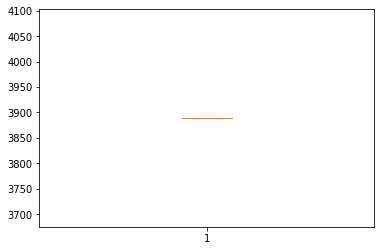

In [341]:
plt.boxplot(custos_13ger)
plt.show()

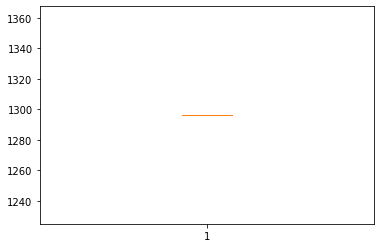

In [342]:
plt.boxplot(custos_19ger)
plt.show()

In [343]:
np.mean(custos_40ger)

125293.52661294173

In [57]:
# nelder-mead for multimodal function optimization
from scipy.optimize import minimize
from numpy.random import rand
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi

In [58]:
global system

def minimo(x):
    
    pg=np.zeros(len(x))
    
    for i in range(len(x)):
        pg[i]=x[i]
    
        pg_min = system.pg_min
        pg_max = system.pg_max
        c_k = system.c_k
        b_k = system.b_k
        a_k = system.a_k
        e_k = system.e_k
        f_k = system.f_k
        
        demanda = system.demanda
    
    return np.sum(a_k*pg**2 + b_k*pg + c_k + np.abs(e_k*np.sin(f_k*(pg_min-pg)))) + 10000*(demanda-np.sum(pg))**2

In [59]:
minimo(gbest)
bnds = []

for i in range(len(system.pg_min)):
    
    lista = [system.pg_min[i],system.pg_max[i]]
    bnds.append(lista)

In [62]:
result = minimize(minimo, solution, method='Nelder-Mead',bounds=bnds)

In [63]:
result

 final_simplex: (array([[100.00000799, 371.32745794, 250.        ,  25.        ,
         63.75      , 279.38280936,  63.75      , 124.16634647,
        200.0000069 ,  40.        , 150.        ,  75.        ,
         63.75      ,  95.        , 216.87313953,  80.        ,
         80.        , 230.        , 400.        ],
       [100.00000834, 371.32745708, 250.        ,  25.        ,
         63.75      , 279.38280437,  63.75      , 124.1663405 ,
        200.0000072 ,  40.        , 150.        ,  75.        ,
         63.75      ,  95.        , 216.87313908,  80.        ,
         80.        , 230.        , 400.        ],
       [100.00000727, 371.32745981, 250.        ,  25.        ,
         63.75      , 279.38280652,  63.75      , 124.16634514,
        200.00000628,  40.        , 150.        ,  75.        ,
         63.75      ,  95.        , 216.87314072,  80.        ,
         80.        , 230.        , 400.        ],
       [100.00000765, 371.32745128, 250.        ,  25.        

In [644]:
result

 final_simplex: (array([[100.00000337, 434.15926453, 250.        ,  25.        ,
         63.75      , 237.5903581 ,  63.75      , 100.00000258,
        200.00000076,  40.        , 150.        ,  75.        ,
         63.75      ,  95.        , 220.        ,  80.        ,
         80.        , 230.        , 400.        ],
       [100.00000305, 434.15926761, 250.        ,  25.        ,
         63.75      , 237.59039545,  63.75      , 100.00000234,
        200.00000069,  40.        , 150.        ,  75.        ,
         63.75      ,  95.        , 220.        ,  80.        ,
         80.        , 230.        , 400.        ],
       [100.00000305, 434.15926766, 250.        ,  25.        ,
         63.75      , 237.59039567,  63.75      , 100.00000234,
        200.00000069,  40.        , 150.        ,  75.        ,
         63.75      ,  95.        , 220.        ,  80.        ,
         80.        , 230.        , 400.        ],
       [100.00000334, 434.15926686, 250.        ,  25.        

In [620]:
from sympy import *
import numpy as np
import math
x = Symbol('x')
y = sqrt(x**2+1e-8)
yprime = y.diff(x)
yprime

x/sqrt(x**2 + 1.0e-8)

In [621]:
abs(-1)

1

In [880]:
val = system.e_k*(np.sin(system.f_k*(gbest-system.pg_min)))
np.sum(gbest*gbest*system.a_k + gbest*system.b_k + system.c_k + np.sqrt(val*val+1e-1))

8234.198562833337

# Pipeline


In [46]:
lista = []
sistemas =[3,13,19,40]

system.init(3)
matriz_solutions_3 = np.zeros((100,len(system.pg_min)))
matriz_costs_3 = np.zeros((100,101))


system.init(13)
matriz_solutions_13 = np.zeros((100,len(system.pg_min)))
matriz_costs_13 = np.zeros((100,101))


system.init(19)
matriz_solutions_19 = np.zeros((100,len(system.pg_min)))
matriz_costs_19 = np.zeros((100,101))


system.init(40)
matriz_solutions_40 = np.zeros((100,len(system.pg_min)))
matriz_costs_40 = np.zeros((100,101))


lista_matrizes_s = [matriz_solutions_3,matriz_solutions_13,matriz_solutions_19,matriz_solutions_40]
lista_matrizes_c = [matriz_costs_3,matriz_costs_13,matriz_costs_19,matriz_costs_40]


for gen in sistemas:
    
    
    if gen==3:
        part=50
        matriz_s =  lista_matrizes_s[0]
        matriz_c =  lista_matrizes_c[0]
    if gen==13:
        part=150
        matriz_s =  lista_matrizes_s[1]
        matriz_c =  lista_matrizes_c[1]
        
    if gen==19:
        part=300
        matriz_s =  lista_matrizes_s[2]
        matriz_c =  lista_matrizes_c[2]
    if gen ==40:
        part=500
        matriz_s =  lista_matrizes_s[3]
        matriz_c =  lista_matrizes_c[3]

    
    
    for iteracao in range(100):
        
        lista=[]
        
        print(f'Iteração {iteracao}')
        system.init(gen)

        pso = Particle_Swarm_Optimization()

        pso.init(c1_= 2.05, c2_= 2.05, w_max=0.9, w_min=0.4, inertia_method = 'linear', max_iter_ =100, n_particles_ = part, alfa_=1, beta_=1e5,v_amp_= 0.4, v_clamp_=0.3, initial_=0, initi=False, constriction_factor=False, inertia_weight=True)

        gbest = pso.optimize(system, verbose=False)

        for a in pso.list_gbest_costs:

            lista.append(a)

        inicial = gbest

        gbest

        interior_points = IPOPT()

        solution, f_obj = interior_points.optimize(system, initial=inicial, n=1e-7, verbose=False)

        lista.append(f_obj)
        
        matriz_c[iteracao,:]=lista
        matriz_s[iteracao,:]=solution
        print(lista[-1])

Iteração 0
8241.58750878571
Iteração 1
8234.071708653912
Iteração 2
8234.071708836962
Iteração 3
8234.071708653912
Iteração 4
8250.204849065847
Iteração 5
8234.071708653912
Iteração 6
8241.58750878571
Iteração 7
8234.071708653912
Iteração 8
8241.58750878571
Iteração 9
8250.204849065847
Iteração 10
8241.174468205027
Iteração 11
8234.071708653912
Iteração 12
8234.071708653912
Iteração 13
8343.936245685594
Iteração 14
8376.874527816934
Iteração 15
8241.58750878571
Iteração 16
8250.204849065847
Iteração 17
8241.174468205027
Iteração 18
8241.174468205027
Iteração 19
8250.204849065847
Iteração 20
8241.174468205027
Iteração 21
8376.874527816934
Iteração 22
8241.58750878571
Iteração 23
8241.58750878571
Iteração 24
8241.58750878571
Iteração 25
8343.936245685594
Iteração 26
8234.071708653912
Iteração 27
8241.174468205027
Iteração 28
8234.071708653912
Iteração 29
8250.204849065847
Iteração 30
8471.841684140258
Iteração 31
8241.58750878571
Iteração 32
8234.071708653912
Iteração 33
8376.87452781693

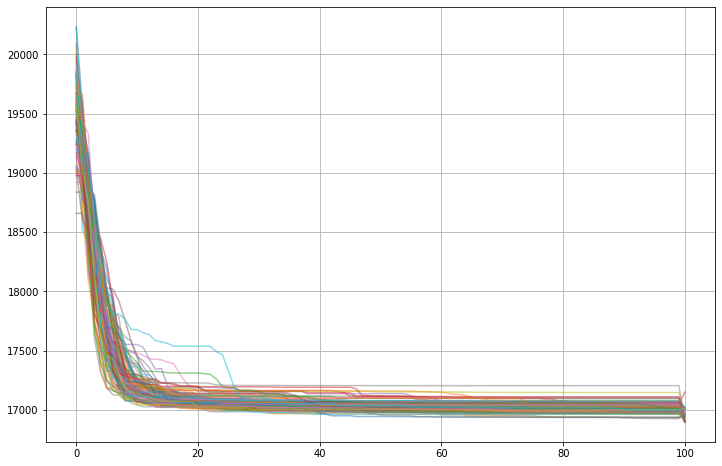

In [57]:
plt.figure(figsize=(12,8))
for i in range(len(lista_matrizes_s[1])):
    
    plt.plot(lista_matrizes_c[2][i,:],alpha=0.5)
    
plt.grid()

In [58]:
np.min(lista_matrizes_c[2][:,-1])

16896.813854498316

In [61]:
gen = 0
print('minimo: ',np.min(lista_matrizes_c[gen][:,-1]))
print('media: ', np.mean(lista_matrizes_c[gen][:,-1]))
print('std: ', np.std(lista_matrizes_c[gen][:,-1]))

minimo:  8234.071708653912
media:  8284.229915283744
std:  72.09003676705709


In [62]:
gen = 1
print('minimo: ',np.min(lista_matrizes_c[gen][:,-1]))
print('media: ', np.mean(lista_matrizes_c[gen][:,-1]))
print('std: ', np.std(lista_matrizes_c[gen][:,-1]))

minimo:  24217.051896353078
media:  24530.658580527703
std:  149.41383538243153


In [63]:
gen = 2
print('minimo: ',np.min(lista_matrizes_c[gen][:,-1]))
print('media: ', np.mean(lista_matrizes_c[gen][:,-1]))
print('std: ', np.std(lista_matrizes_c[gen][:,-1]))

minimo:  16896.813854498316
media:  16963.566243521724
std:  39.38815220898624


In [64]:
gen = 3
print('minimo: ',np.min(lista_matrizes_c[gen][:,-1]))
print('media: ', np.mean(lista_matrizes_c[gen][:,-1]))
print('std: ', np.std(lista_matrizes_c[gen][:,-1]))

minimo:  121558.1563908273
media:  123318.94338933438
std:  930.2424553617896


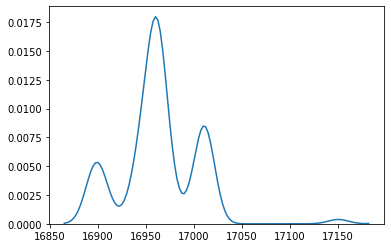

In [68]:
import seaborn as sns
sns.kdeplot(lista_matrizes_c[2][:,-1])

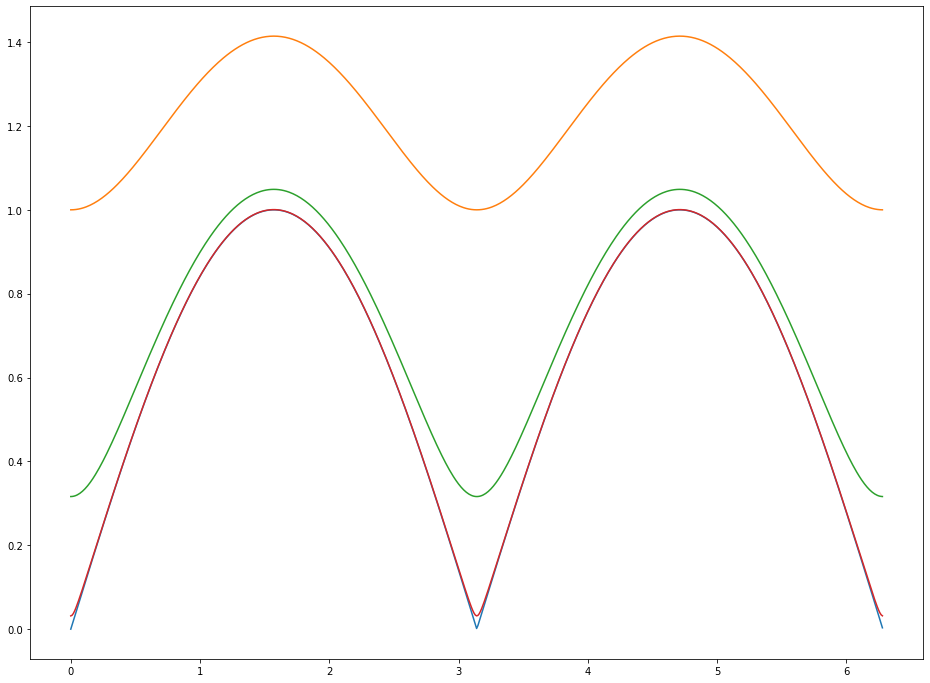

In [203]:
plt.figure(figsize=(16,12))
x = np.arange(0,2*np.pi,0.01)

y = np.abs(np.sin(x))

plt.plot(x,y, label='módulo')


y2= np.sqrt(np.sin(x)**2 + 1)

plt.plot(x,y2, label='suavização n = 1')

y2= np.sqrt(np.sin(x)**2 + 1e-1)

plt.plot(x,y2)

# plt.plot(x,y2, label='suavização n = 1e-1')

y3= np.sqrt(np.sin(x)**2 + 1e-3)


plt.plot(x,y3, label='suavização n = 1e-3')


# plt.grid()

# plt.legend()

In [194]:
vetor0 = []
vetor1 = []
vetor2 = []

for i in range(system.pg_min[0],system.pg_max[0]):
    system.init(13)
    vetor0.append(system.costs(np.array([i,0,0,0,0,0,0,0,0,0,0,0,0])))
    
for i in range(system.pg_min[1],system.pg_max[1]):
    system.init(13)
    vetor1.append(system.costs(np.array([0,i,0,0,0,0,0,0,0,0,0,0,0])))
    

for i in range(system.pg_min[2],system.pg_max[2]):
    system.init(13)
    vetor2.append(system.costs(np.array([0,0,i,0,0,0,0,0,0,0,0,0,0])))
    